<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Trương Tiến Anh

**MSSV**: 22120017


---

# Thư viện

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [2]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8662 entries, 0 to 8661
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8662 non-null   object 
 1   loai_dien_thoai         8662 non-null   object 
 2   thoi_gian_bao_hanh      8662 non-null   float64
 3   danh_gia                8662 non-null   float64
 4   so_luong_binh_luan      8662 non-null   int64  
 5   duong_dan               8662 non-null   object 
 6   mau_sac                 8376 non-null   object 
 7   gia_moi                 7148 non-null   float64
 8   gia_cu                  5083 non-null   float64
 9   he_dieu_hanh            8662 non-null   object 
 10  cpu                     8647 non-null   object 
 11  ram                     8646 non-null   float64
 12  bo_nho_trong            8362 non-null   float64
 13  dung_luong_pin          8462 non-null   float64
 14  thiet_ke                8546 non-null   objec

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
1,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,6.0,128.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
2,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
3,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,6.0,128.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
4,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xanh,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]


# Câu hỏi: Mức giá giảm có ảnh hưởng đến lượt đánh giá và mức độ hài lòng của khách hàng không?

## Mục đích

## Tiền xử lý

In [3]:
df = data[["gia_cu", "gia_moi", "so_luong_binh_luan"]].copy().dropna()

# Tính toán mức giá giảm = Gía cũ - Gía mới
df['Mức giá giảm'] = df['gia_cu'] - df['gia_moi']
df['Có giảm giá'] = df['Mức giá giảm'] > 0

#Tính trung bình lượt đánh giá theo sản phẩm có giảm giá
mean_rate = df.groupby('Có giảm giá')['so_luong_binh_luan'].mean()
mean_rate

Có giảm giá
False    455.638710
True     245.232216
Name: so_luong_binh_luan, dtype: float64

## Trực quan hóa

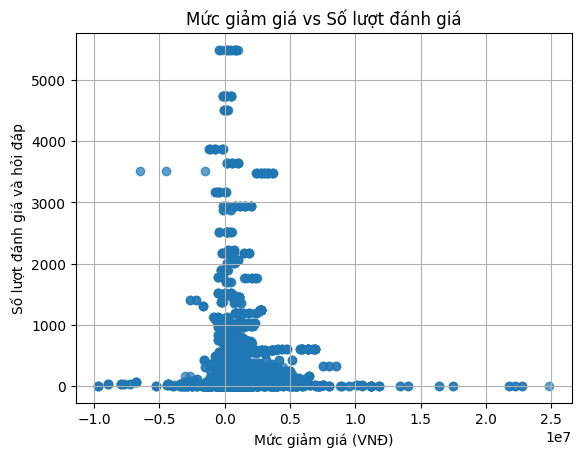

Hệ số tương quan: -0.0630189080063586


In [4]:
# Vẽ biểu đồ phân tán: Mức giảm giá với Số lượt đánh giá
plt.scatter(df['Mức giá giảm'], df['so_luong_binh_luan'], alpha=0.7)
plt.title("Mức giảm giá vs Số lượt đánh giá")
plt.xlabel("Mức giảm giá (VNĐ)")
plt.ylabel("Số lượt đánh giá và hỏi đáp")
plt.grid(True)
plt.show()

#Hệ số tương quan
correlation = df['Mức giá giảm'].corr(df['so_luong_binh_luan'])
print(f'Hệ số tương quan: {correlation}')

## Nhận xét

# Câu hỏi: Thời gian bảo hành có ảnh hưởng đến sự hài lòng của khách hàng không?

## Mục đích

## Tiền xử lý

In [5]:
df = data[["thoi_gian_bao_hanh", "danh_gia"]].copy().dropna()

# Tính trung bình đánh giá theo 'Thời gian bảo hành (tháng)'
mean_satisfaction = df.groupby('thoi_gian_bao_hanh')['danh_gia'].mean()
mean_satisfaction

thoi_gian_bao_hanh
0.0     4.985872
1.0     4.975000
6.0     4.975118
12.0    4.985815
15.0    5.000000
18.0    4.975660
24.0    5.000000
30.0    4.957143
Name: danh_gia, dtype: float64

## Trực quan hóa

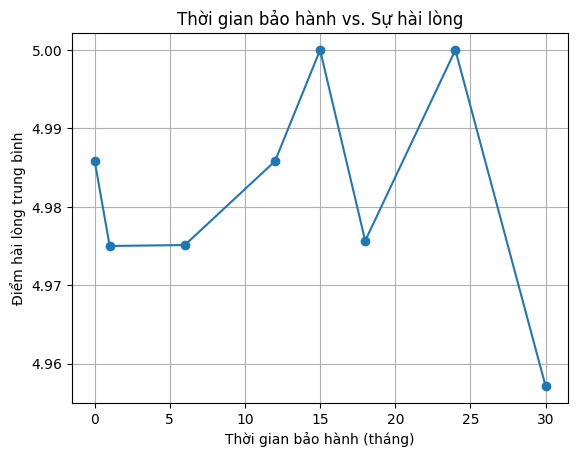

Hệ số tương quan: 0.014617309719820304


In [6]:
plt.plot(mean_satisfaction.index, mean_satisfaction.values, marker='o')
plt.title('Thời gian bảo hành vs. Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng trung bình')
plt.grid(True)
plt.show()

correlation = data['thoi_gian_bao_hanh'].corr(data['danh_gia'])
print(f'Hệ số tương quan: {correlation}')

## Nhận xét